<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/star_A0620_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A0620-00 (Binary Star)**

In [ ]:
!pip install astropy photutils astroquery lightkurve -q
from astropy import units as u
from astroquery.ipac.irsa import Irsa
import lightkurve as lk
from astroquery.vizier import Vizier
from astropy.coordinates import Angle
from astroquery.splatalogue import Splatalogue
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

**HEASARC X**

Load data manually for x -ray from ROSAT

Filename: /root/.astropy/cache/download/url/97efc36b4eae8317ced3f246650bbc1b/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     192   (480, 240)   float32   
SIMPLE  =                    T / Standard FITS format                           BITPIX  =                  -32 / No. of bits per pixel                          NAXIS   =                    2 / No. of axes in image                           NAXIS1  =                  480 / No. of pixels                                  NAXIS2  =                  240 / No. of pixels                                  EXTEND  =                    T / FITS extension may be present                  COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H BLOCKED =                    T / FITS file may be blocked                               =                                                         

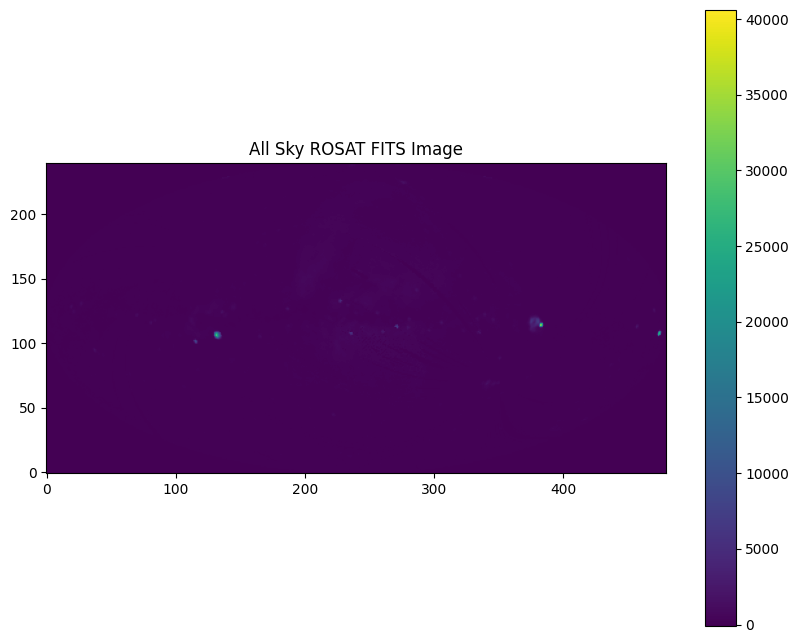

In [ ]:
# Load FITS fioe directly and inspect with X-Ray with ROSAT - The ROSAT All-Sky Survey (RASS)
from astropy.io import fits
import matplotlib.pyplot as plt

# Specify the path to the FITS file
fits_file = 'https://raw.githubusercontent.com/deltorobarba/astrophysics/master/file_allsky_rosat.fits'

# Open the FITS file
hdul = fits.open(fits_file)

# Print the file information
hdul.info()

# Access the primary HDU (Header/Data Unit) to get the data
primary_hdu = hdul[0]
data = primary_hdu.data

# Display the header to learn more about the file
print(primary_hdu.header)

# Check if there is data
if data is not None:
    # Show the dimensions of the data
    print(f"Data shape: {data.shape}")

    # Display the image if it is 2D
    if data.ndim == 2:
        plt.figure(figsize=(10, 8))
        plt.imshow(data, origin='lower', cmap='viridis')
        plt.colorbar()
        plt.title("All Sky ROSAT FITS Image")
        plt.show()
    else:
        print("Data is not 2D, unable to display as an image.")
else:
    print("No data found in the primary HDU.")


In [ ]:
# Close the FITS file
hdul.close()

The HEASARC X (High Energy Astrophysics Science Archive Research Center) is a powerful repository for astronomical data, especially in the X-ray, gamma-ray, and extreme ultraviolet ranges.

It hosts data from space missions like Chandra, XMM-Newton, Swift, RXTE, and many others that observe high-energy phenomena such as black holes, neutron stars, supernova remnants, and X-ray binaries (like A0620−00)

https://heasarc.gsfc.nasa.gov/w3browse/all/xray.html

* Access to multi-mission data (X-ray, gamma-ray, UV, etc.)
* Observation logs, images, spectra, and light curves
* Tools for data analysis (e.g., XSPEC, FTOOLS, and others)

Query the HEASARC database for high-energy astrophysical data using the astroquery package. Astroquery allows you to perform queries directly within Python and retrieve metadata about observations, spectra, and light curves for a given astronomical object.

Search for data about the A0620−00 system (or any other X-ray binary) in the HEASARC database

https://de.m.wikipedia.org/wiki/A0620%E2%88%9200

In [ ]:
# Use Simbad to get coordinates



In [ ]:
from astroquery.heasarc import Heasarc
from astropy.coordinates import SkyCoord
import astropy.units as u

# Initialize the Heasarc class
heasarc = Heasarc()

# Coordinates of A0620−00 (as obtained earlier or from databases like SIMBAD)
coords = SkyCoord(ra=95.68559292*u.deg, dec=-0.34563611*u.deg)

# Query HEASARC for available data (within a 0.1-degree radius)
# The mission "swiftmastr" can be replaced with others like "chandra" or "xmmssc"
result = heasarc.query_region(coords, mission="swiftmastr", radius="0.1 deg")

# Print the result to explore available data
print(result)

The "swiftmastr" mission refers to Swift’s master catalog. "swiftmastr" can be replaced with other missions like "chandra" (Chandra X-ray Observatory), "xmmssc" (XMM-Newton Science Catalog), or "rosmaster" (ROSAT).

Some missions to explore:
* swiftmastr: Swift X-ray mission
* xmmssc: XMM-Newton Science Catalog
* chanmaster: Chandra Master Catalog
* rxte_master: RXTE (Rossi X-ray Timing Explorer)
* rosmaster: ROSAT

In [ ]:
# List available missions in HEASARC
missions = heasarc.query_mission_list()
print(missions)

In [ ]:
result = heasarc.query_object("A0620-00", mission="SAS-3")

In [ ]:
# Explore the result table (columns, number of rows, etc.)
print(result.columns)
print(f"Number of observations found: {len(result)}")

# If there are multiple observations, you can list them:
for i, row in enumerate(result):
    print(f"Observation {i+1}:")
    print(f"  Obs ID: {row['OBSID']}")
    print(f"  Start Date: {row['START_DATE']}")
    print(f"  Exposure (s): {row['EXPOSURE']}")
    print(f"  Instrument: {row['INSTRUMENT']}")
    print(f"  RA: {row['RA_OBJ']}  Dec: {row['DEC_OBJ']}")